<a href="https://colab.research.google.com/github/ahmedmoustafa/AUC-Fundamentals-of-Data-Science-II-Spring-2023/blob/main/examples/maternal-smoking/smoking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maternal Smoking

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_table("https://raw.githubusercontent.com/ahmedmoustafa/AUC-Fundamentals-of-Data-Science-II-Spring-2023/main/examples/maternal-smoking/smoking.tsv")
df.shape

(610, 20)

In [3]:
df.head()

,id,date,gestation,weight,parity,mom.race,mom.age,mom.edu,mom.height,mom.weight,dad.race,dad.age,dad.edu,dad.height,dad.weight,marital,income,smoke,quit.time,cigs
0,15,1411,284,120,1,asian,27,5,62,100,asian,31,5,65,110,1,1,never,0,0
1,20,1499,282,113,2,white,33,5,64,135,white,38,5,70,148,1,4,never,0,0
2,100,1673,286,136,4,white,25,2,62,93,white,28,2,64,130,1,4,until_pregnancy,2,2
3,129,1562,245,132,2,black,23,1,65,140,black,23,4,71,192,1,2,never,0,0
4,142,1408,289,120,3,white,25,4,62,125,white,26,1,70,180,0,2,never,0,0


## Q1. Does the mom's smoking pattern affect the newborn birth weight?

### Numerically

In [4]:
df.groupby('smoke').agg(Median_Baby_Weight = ('weight', 'median')).reset_index()

,smoke,Median_Baby_Weight
0,never,123.0
1,now,114.5
2,once_not_now,123.5
3,until_pregnancy,124.5


### Visually

<Axes: xlabel='smoke', ylabel='weight'>

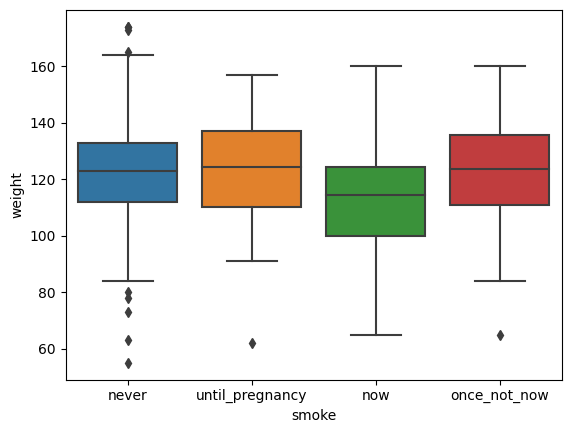

In [5]:
sns.boxplot(data = df, x = 'smoke', y = 'weight')

The effects of maternal smoking on newborn weight are clearly illustrated above.

## Q2. Does the mom’s race affect the newborn birth weight?


## Q3. Is there a correlation between the mom’s weight and the baby’s weight?


## Q4. Is there a correlation between the dad’s weight and the baby’s weight?

## Q5. From Q3 and Q4, which is a stronger correlation?

## Q6. Is there a correlation between the mom’s weight and the dad’s weight?

## Q7. On average, does the mom’s weight change across the races?

## Q8. Does mom’s smoking pattern change with the mom’s education?

## Q9. Does mom’s smoking pattern change with the family income?

## Q10. Is there a relationship between the mom’s race and the dad’s race?